In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv(r'/content/Airline_customer_satisfaction.csv')

In [ ]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [ ]:
data['Customer Type'].value_counts()

,count
Customer Type,
Loyal Customer,106100
disloyal Customer,23780


In [ ]:
data['Type of Travel'].value_counts()

,count
Type of Travel,
Business travel,89693
Personal Travel,40187


In [ ]:
data['Class'].value_counts()

,count
Class,
Business,62160
Eco,58309
Eco Plus,9411


In [ ]:
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
data['Type of Travel'] = data['Type of Travel'].map({'Business travel':1, 'Personal Travel':0})
data = pd.get_dummies(data, columns=['Class'], prefix='Class', drop_first=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Type,129880.0,0.816908,0.386743,0.0,1.0,1.0,1.0,1.0
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Type of Travel,129880.0,0.690584,0.462255,0.0,0.0,1.0,1.0,1.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0


In [ ]:
features = [
 'Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes'
]

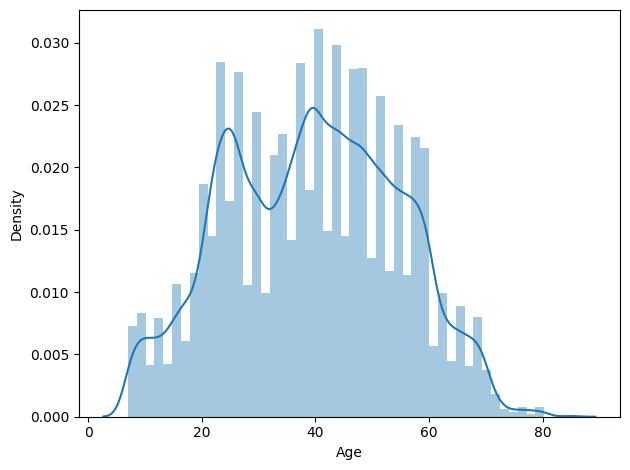

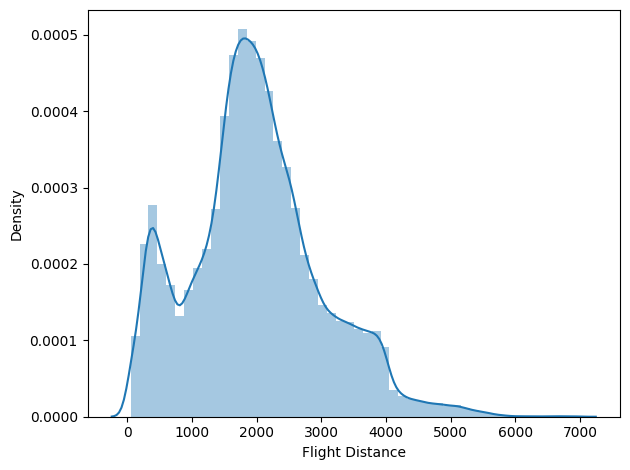

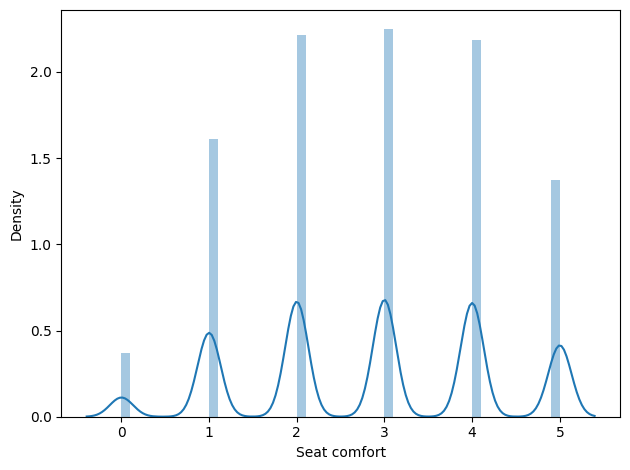

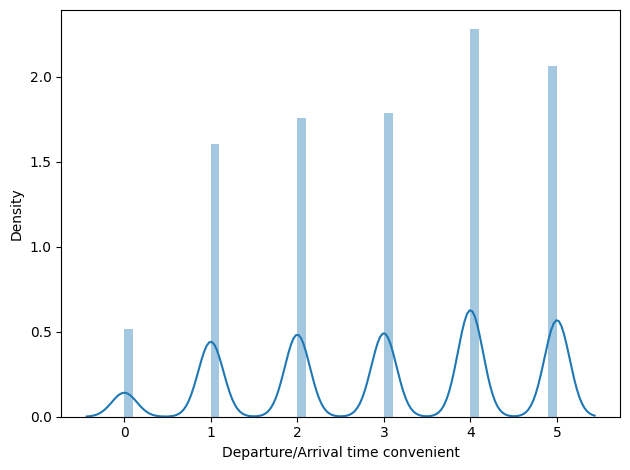

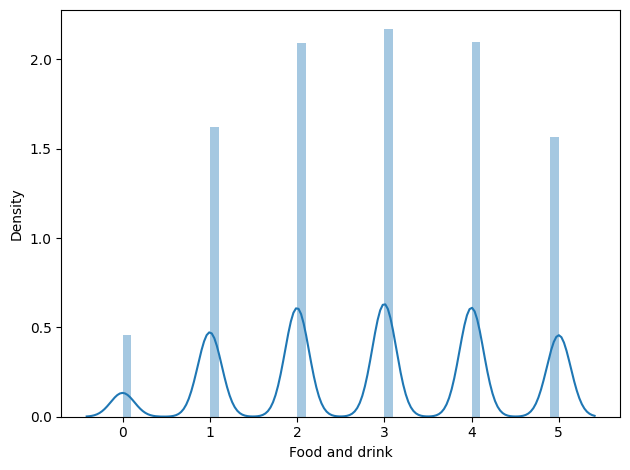

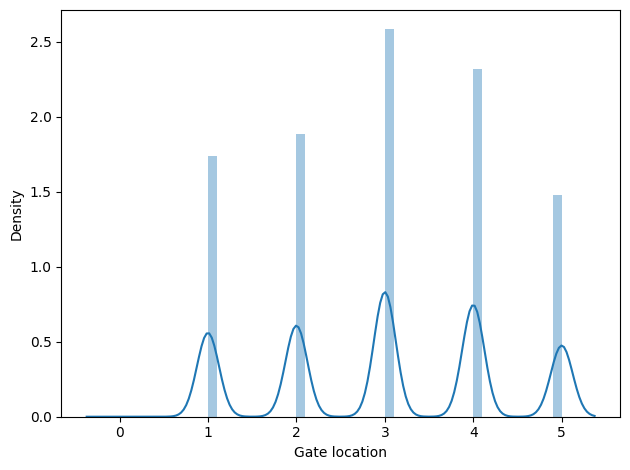

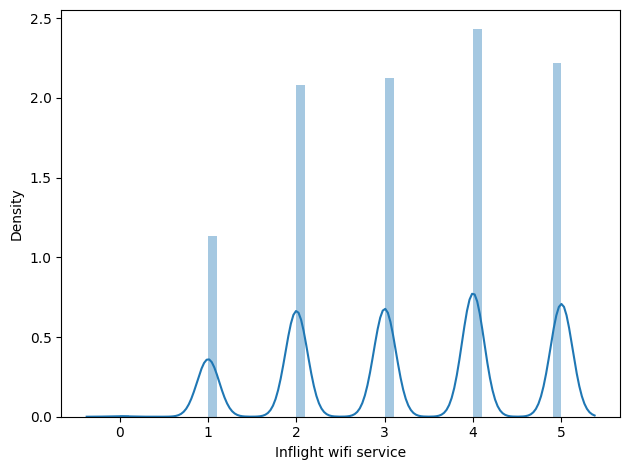

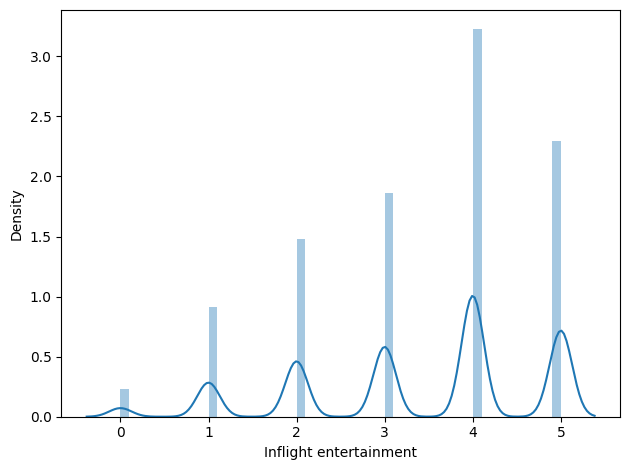

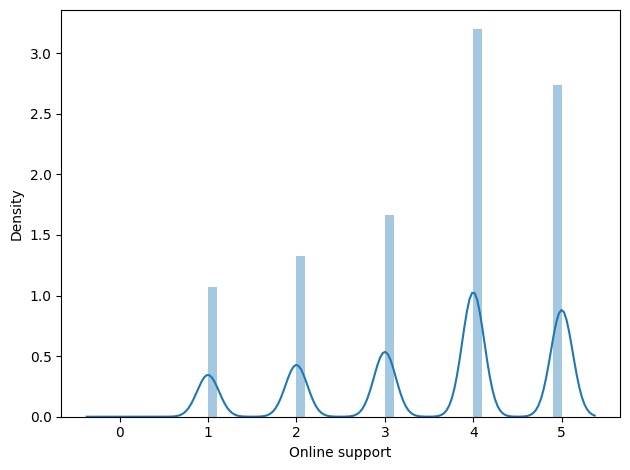

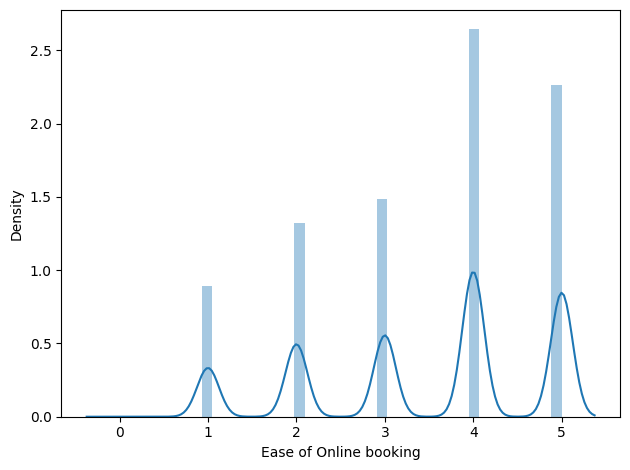

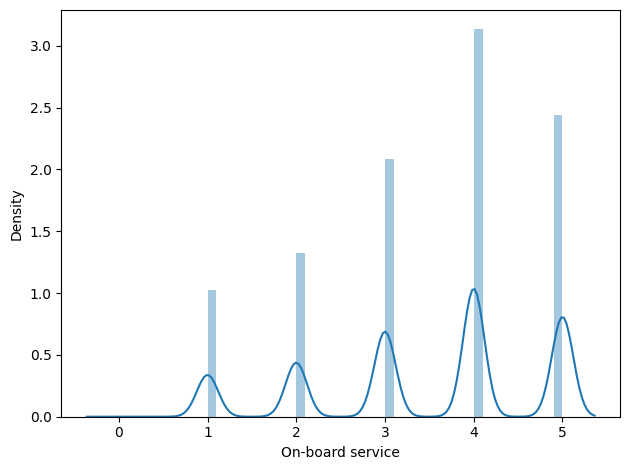

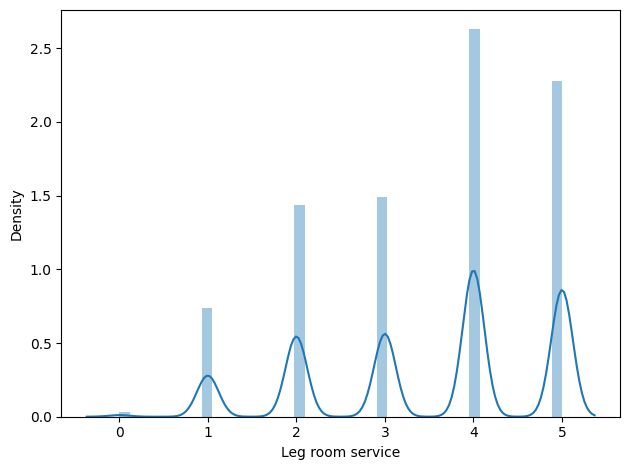

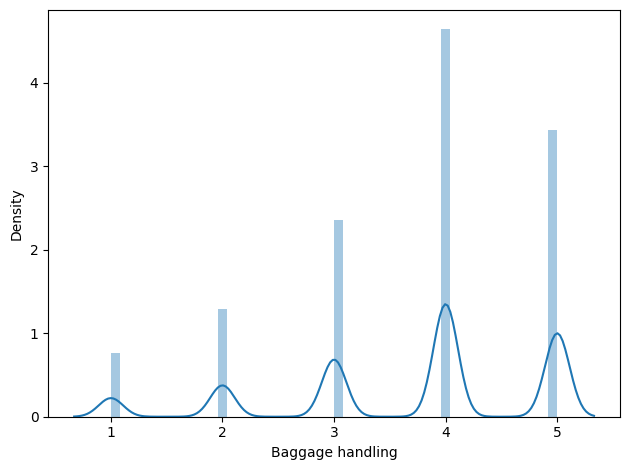

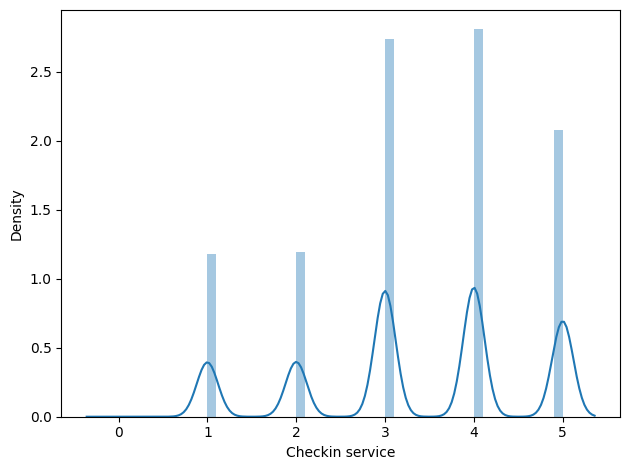

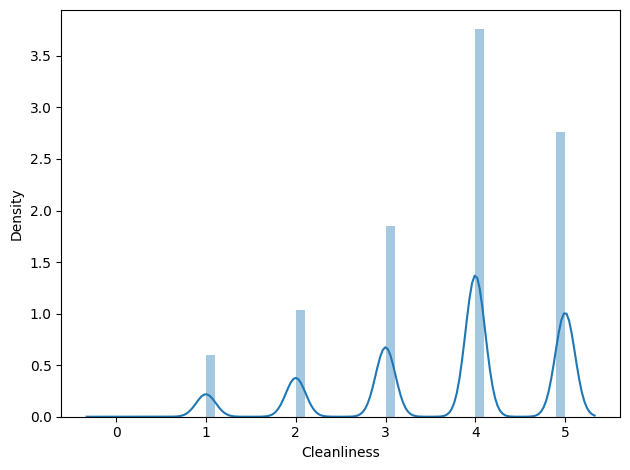

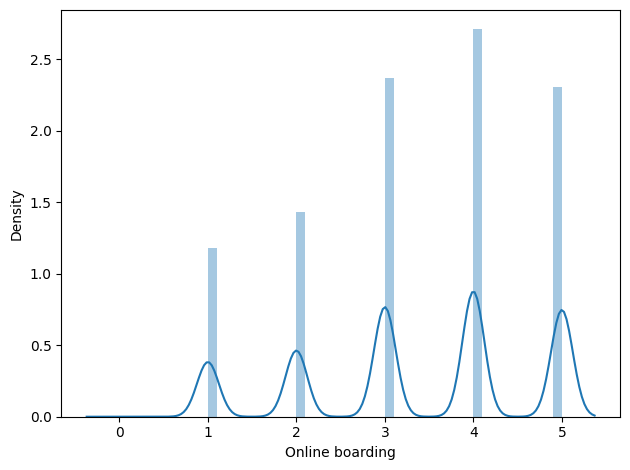

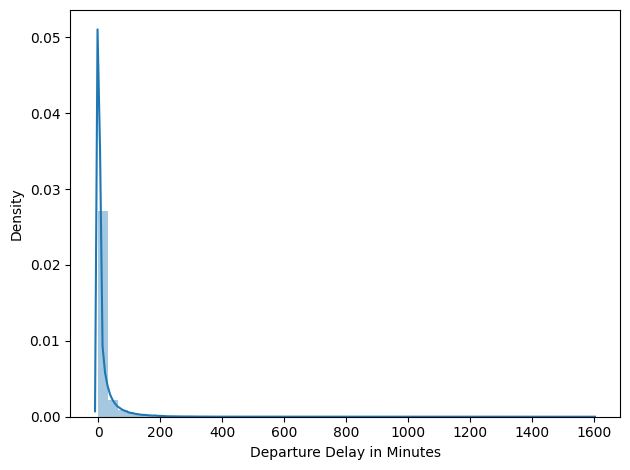

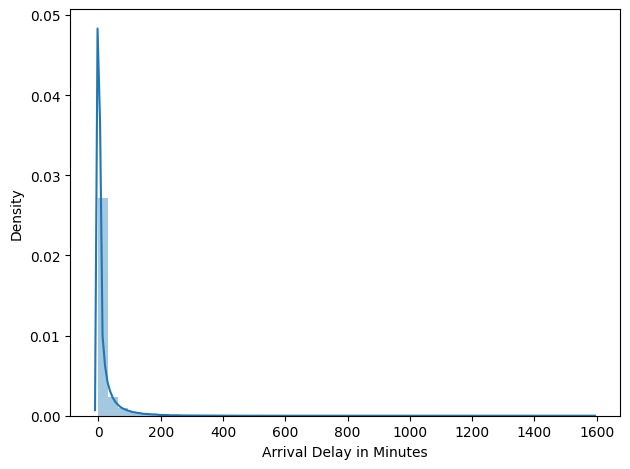

In [ ]:
for i in features:
  sns.distplot(data[i])
  plt.tight_layout()
  plt.show()

In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
Arrival Delay in Minutes,393
Customer Type,0
satisfaction,0
Type of Travel,0
Flight Distance,0
Seat comfort,0
Age,0
Departure/Arrival time convenient,0
Food and drink,0
Inflight wifi service,0


In [ ]:
data['Arrival Delay in Minutes'].median()

0.0

In [ ]:
data['Arrival Delay in Minutes']

,Arrival Delay in Minutes
0,0.0
1,305.0
2,0.0
3,0.0
4,0.0
...,...
129875,0.0
129876,172.0
129877,163.0
129878,205.0


In [ ]:
data['satisfaction'].value_counts()

,count
satisfaction,
satisfied,71087
dissatisfied,58793


In [ ]:
data['satisfaction'].value_counts(normalize=True)

,proportion
satisfaction,
satisfied,0.547328
dissatisfied,0.452672


In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)
data_imputed = imputer.fit_transform(data.drop('satisfaction', axis=1))
data_imputed = pd.DataFrame(data_imputed, columns=data.drop('satisfaction', axis=1).columns)

In [ ]:
data['Arrival Delay in Minutes'] = data_imputed['Arrival Delay in Minutes']

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data['satisfaction'] = data['satisfaction'].map({'dissatisfied': 0,'satisfied': 1})

In [ ]:
data['satisfaction'].value_counts()

,count
satisfaction,
1,71087
0,58793


In [ ]:
data.corr()['satisfaction'].sort_values(ascending=False)

,satisfaction
satisfaction,1.000000
Inflight entertainment,0.523496
Ease of Online booking,0.431772
Online support,0.390143
On-board service,0.352047
Online boarding,0.338147
Leg room service,0.304928
Customer Type,0.292592
Checkin service,0.266179
Baggage handling,0.260347


In [ ]:
x = data.drop('satisfaction', axis=1)
y = data['satisfaction']

In [ ]:
selector = SelectKBest(f_classif, k=10)
selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
selected_features

Index(['Customer Type', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Online boarding', 'Class_Eco'],
      dtype='object')

In [ ]:
x = x[selected_features]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
def ht(model,params):
  random_search = RandomizedSearchCV(model,params,cv=5,scoring='accuracy')
  random_search.fit(x_train,y_train)
  print(model.__class__.__name__)
  print(f"best params : {random_search.best_params_}")
  print(f"best score : {random_search.best_score_}")

In [ ]:
lr_hyperparameters = {
        'penalty': ['l2','l1','elasticnet',None],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [100, 200, 500]
    }

ht(LogisticRegression(),lr_hyperparameters)

LogisticRegression
best params : {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.01}
best score : 0.8139340467913726


In [ ]:
knn_hyperparameters = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    }

ht(KNeighborsClassifier(),knn_hyperparameters)

KNeighborsClassifier
best params : {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
best score : 0.8784551155158157


In [ ]:
nb_hyperparameters = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }

ht(GaussianNB(),nb_hyperparameters)

GaussianNB
best params : {'var_smoothing': 1e-09}
best score : 0.7963601301792528


In [ ]:
dt_hyperparameters = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }

ht(DecisionTreeClassifier(),dt_hyperparameters)

DecisionTreeClassifier
best params : {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
best score : 0.8862892841099808


In [ ]:
rf_hyperparameters = {
        'n_estimators': [100, 200, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }

ht(RandomForestClassifier(),rf_hyperparameters)

RandomForestClassifier
best params : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
best score : 0.8933919639242536


In [ ]:
svc_hyperparameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5]
}


ht(SVC(), svc_hyperparameters)


In [ ]:
gb_hyperparameters = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.6, 0.8, 1.0],
        'max_features': ['sqrt', 'log2', None]
    }


ht(GradientBoostingClassifier(),gb_hyperparameters)

In [ ]:
xg_hyperparameters = {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [1, 1.5, 2]
    }


ht(XGBClassifier(),xg_hyperparameters)